
# Regression Tutorial using LoanAmount as Target

This notebook demonstrates how to build a regression pipeline using the loan prediction dataset.  
Target variable: **LoanAmount**  
We will:
- Load and clean the dataset
- Preprocess categorical and numeric features
- Train multiple regression models
- Evaluate using MAE, MSE, RMSE, R²
- Compare models in a summary table


## 1) Imports

In [1]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
print("Ready for regression tutorial!")


Ready for regression tutorial!


## 2) Utility Functions

In [6]:

def load_data(path):
    """Load dataset and preview."""
    df = pd.read_csv(path)
    print("Dataset shape:", df.shape)
    display(df.head())
    return df

def clean_data(df):
    """Remove duplicates and fully empty rows."""
    before = df.shape[0]
    df = df.drop_duplicates()
    df = df.dropna(how="all")
    after = df.shape[0]
    print(f"Removed {before - after} duplicate/empty rows.")
    return df

def drop_columns(df, cols_to_drop):
    """Drop irrelevant or unwanted columns."""
    df = df.drop(columns=cols_to_drop, errors="ignore")
    print(f"Dropped columns: {cols_to_drop}")
    return df

def preprocess_data(df, target_col, encoding_method="label"):
    """
    Preprocess data for regression:
    - Encode categorical features
    - Separate features/target
    - Impute missing values
    - Scale features
    """
    assert target_col in df.columns, f"Target column '{target_col}' not found in dataset."
    X = df.drop(columns=[target_col]).copy()
    y = df[target_col].copy()

    # Encode categorical variables with LabelEncoder
    cat_cols = X.select_dtypes(include=["object", "category"]).columns
    for col in cat_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

    # Impute missing values
    imputer = SimpleImputer(strategy="median")
    X[X.columns] = imputer.fit_transform(X)

    # Scale numeric features
    scaler = StandardScaler()
    X[X.columns] = scaler.fit_transform(X)

    return X, y

def split_data(X, y, test_size=0.2):
    """Split dataset into train/test sets."""
    return train_test_split(X, y, test_size=test_size, random_state=42)


## 3) Evaluation Functions

In [3]:

def evaluate_regression(name, model, X_test, y_test):
    """Evaluate regression model with MAE, MSE, RMSE, R2."""
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n=== Evaluation: {name} ===")
    print(f"MAE : {mae:.4f}")
    print(f"MSE : {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²  : {r2:.4f}")
    
    # Plot predicted vs actual
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Actual vs Predicted - {name}")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
    plt.show()

    return {"Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

def compare_regressors(models, X_train, y_train, X_test, y_test):
    """Train and evaluate multiple regressors and return a comparison DataFrame."""
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        res = evaluate_regression(name, model, X_test, y_test)
        results.append(res)
    results_df = pd.DataFrame(results).sort_values(by="RMSE").reset_index(drop=True)
    display(results_df)
    return results_df


## 4) Run Regression Pipeline

Dataset shape: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
Removed 0 duplicate/empty rows.
Dropped columns: ['Loan_ID']

=== Evaluation: Linear Regression ===
MAE : 37

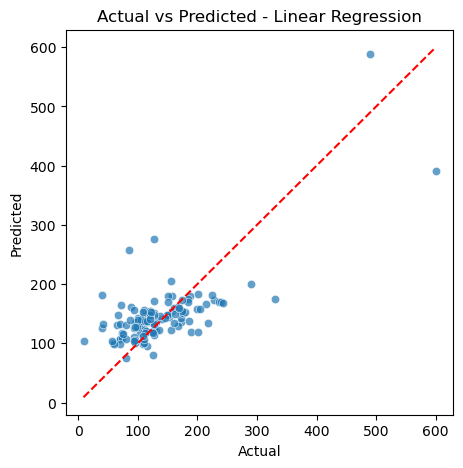


=== Evaluation: Decision Tree ===
MAE : 46.7398
MSE : 6134.2520
RMSE: 78.3215
R²  : -0.1268


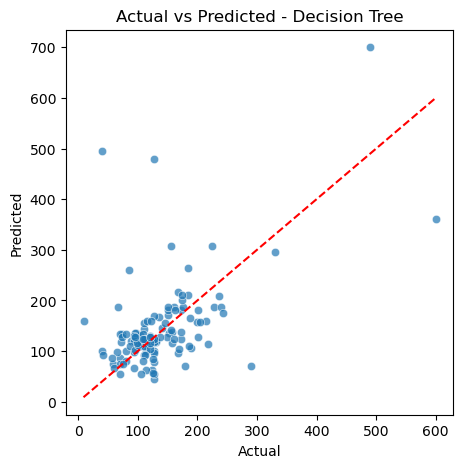


=== Evaluation: Random Forest ===
MAE : 35.8350
MSE : 3654.9166
RMSE: 60.4559
R²  : 0.3286


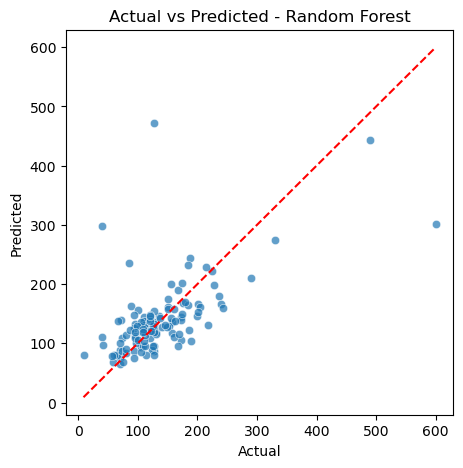


=== Evaluation: Gradient Boosting ===
MAE : 34.3051
MSE : 3069.5843
RMSE: 55.4038
R²  : 0.4361


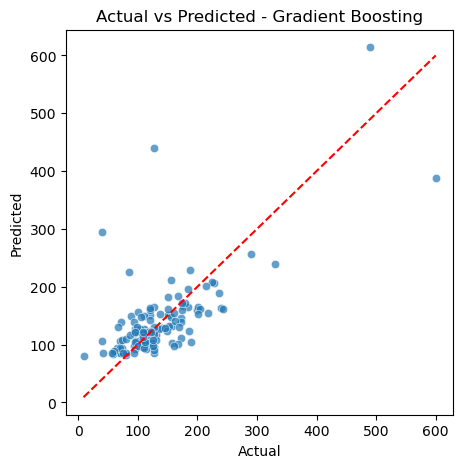

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,37.168661,2666.907779,51.642112,0.510095
1,Gradient Boosting,34.305061,3069.584252,55.403829,0.436124
2,Random Forest,35.834986,3654.916613,60.455906,0.328600
3,Decision Tree,46.739837,6134.252033,78.321466,-0.126849


In [7]:

# Path and config
DATA_PATH = "../datasets/loan_predication/loan_predication.csv"
TARGET = "LoanAmount"
COLS_TO_DROP = ["Loan_ID"]

# Load
df = load_data(DATA_PATH)
print(df.describe())
# Clean
df = clean_data(df)

# Drop unwanted columns
df = drop_columns(df, COLS_TO_DROP)

# Preprocess
X, y = preprocess_data(df, TARGET)
y = y.fillna(y.median())   # or y.mean()
# Split
X_train, X_test, y_train, y_test = split_data(X, y)

# Define regressors
regressors = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Train, evaluate, and compare
results_reg = compare_regressors(regressors, X_train, y_train, X_test, y_test)


In [8]:
from modules import eda_toolkit as eda

In [9]:
df=eda.load_dataset("../datasets/loan_predication/loan_predication.csv")

Shape (rows, columns): (614, 13)


In [10]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
